# Titanic - Machine Learning from Disaster

O Desafio se trata da construção de um modelo preditivo que busca prever
a probabilidade de uma pessoa sobreviver ao titanic baseado em dados dos
passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

Os dados de submisão serão esperados 2 colunas:

    * PassengerId (classificado em qualquer ordem)
    * Sobreviveu (contém suas previsões binárias: 1 para sobreviveu, 0 para falecido)



# Como os dados se encontram :

    PassengerId: Indentificação dos passageiros >  
    Survived	
        sobreviveu s=1 ou n=0                      
    Pclass	
        classe do bilete
            1 = alta  basicamente rico
            2 = media classe media 
            3 = baixa classe baixa (eu)
    Name: nome dos passageiros
    Sex:  genero
    Age:  idade
    SibSp: irmaos ou conjugues
    Parch: pais ou filhos	
    Ticket: numero do bilhete	
    Fare: tarifa do passageiro	
    Cabin: cabine
    Embarked: porto de embarque

    Tipos

    Numericos:
        Discretos:
            Pclass
            Parch
            SibSp
        
        Continua:
            Age
            Fare

        Dado Objetivo:
            Survived

        Id:
            PassengerId

    Categoricas:
        Name
        Sex
        Ticket
        Cabin 
        Embarke


# Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

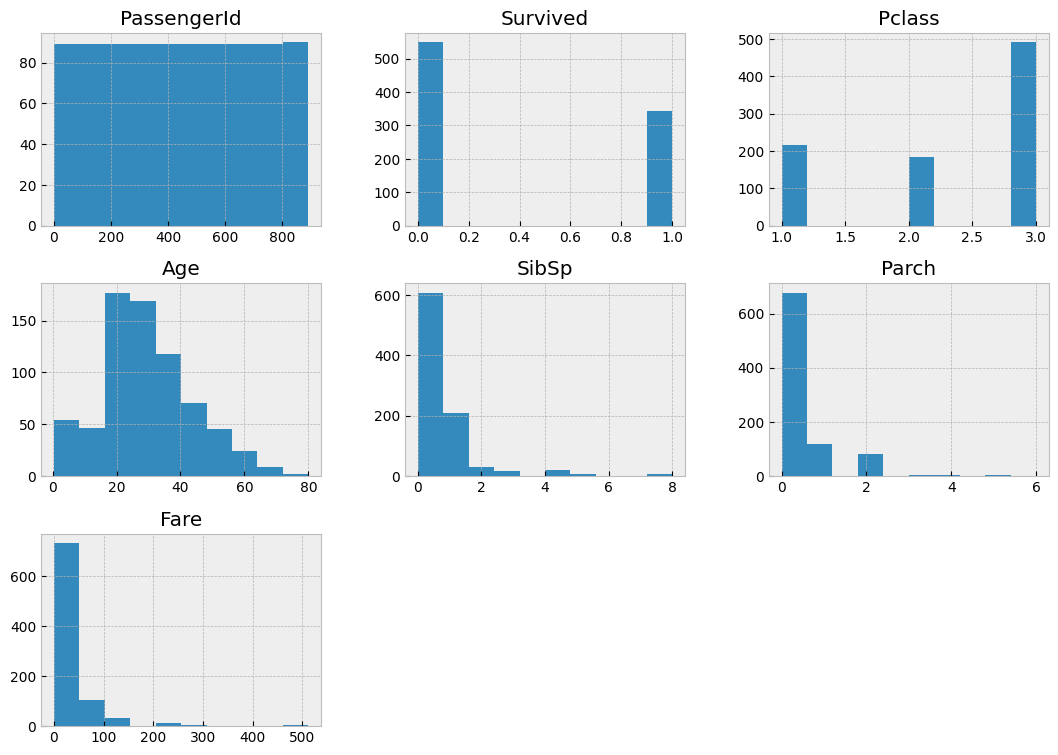

In [7]:
plt.style.use('bmh')
df_train.hist(figsize=(13,9))

In [8]:
print('Quantia de Homens e Mulheres que sobreviveram:')
display(df_train[['Sex', 'Survived']].groupby('Sex').sum())

print('Porcentagem de Homens e Mulheres que sobreviveram:')
display(df_train[['Sex', 'Survived']].groupby('Sex').mean())

Quantia de Homens e Mulheres que sobreviveram:


,Survived
Sex,
female,233
male,109


Porcentagem de Homens e Mulheres que sobreviveram:


,Survived
Sex,
female,0.742038
male,0.188908


Aparentemente 'As mulheres e crianças primeiro' prevaleceu não e mesmo. 

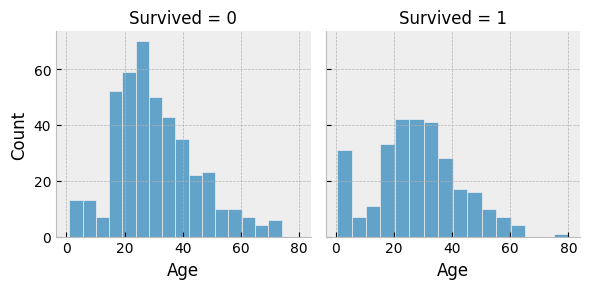

In [9]:
age_survived = sns.FacetGrid(df_train, col='Survived')
age_survived.map(sns.histplot, 'Age')

In [10]:
numeric_columns = df_train.select_dtypes(exclude='object').columns


<Axes: >

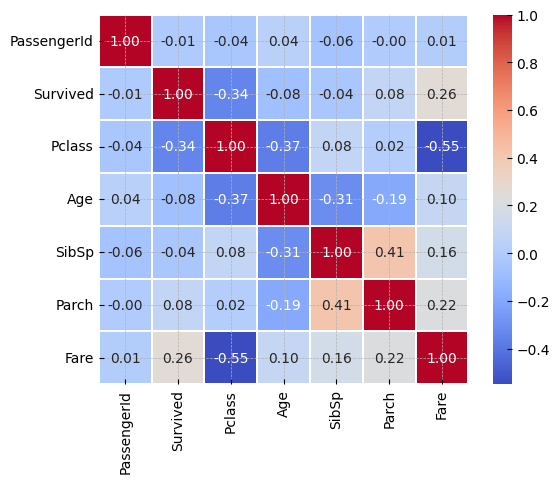

In [11]:
sns.heatmap(df_train[numeric_columns].corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

# Tratamento 

In [12]:
df_test = pd.read_csv('test.csv')

In [13]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
df_train['df_origem'] = 'df_train'
df_test['df_origem'] = 'df_test'

In [15]:
passagerID = df_test.PassengerId.copy()
target = df_train['Survived']
df_train.drop(columns='Survived', axis=1, inplace=True)

In [16]:
df_merge = pd.concat([df_train, df_test], ignore_index=True)

In [17]:
df_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,df_origem
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,df_train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,df_train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,df_train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,df_train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,df_train
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,df_test
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,df_test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,df_test
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,df_test


In [18]:
df_merge.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

In [19]:
df_merge

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,df_origem
0,3,male,22.0,1,0,7.2500,S,df_train
1,1,female,38.0,1,0,71.2833,C,df_train
2,3,female,26.0,0,0,7.9250,S,df_train
3,1,female,35.0,1,0,53.1000,S,df_train
4,3,male,35.0,0,0,8.0500,S,df_train
...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S,df_test
1305,1,female,39.0,0,0,108.9000,C,df_test
1306,3,male,38.5,0,0,7.2500,S,df_test
1307,3,male,NaN,0,0,8.0500,S,df_test


In [20]:
df_merge.isnull().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Embarked       2
df_origem      0
dtype: int64

In [21]:
df_merge['Age'].fillna(value=df_merge['Age'].mean(),inplace=True)
df_merge['Fare'].fillna(value=df_merge['Fare'].mean(),inplace=True)
df_merge['Embarked'].fillna(value=df_merge['Embarked'].mode()[0],inplace=True)

In [22]:
df_merge['Sex'] = df_merge['Sex'].map({'female':0 ,'male':1})

In [23]:
scaler = StandardScaler()
df_merge[['Age', 'Fare']] = scaler.fit_transform(df_merge[['Age', 'Fare']])

In [24]:
df_merge = pd.get_dummies(df_merge, columns=['Embarked'], dtype='int')
df_merge

,Pclass,Sex,Age,SibSp,Parch,Fare,df_origem,Embarked_C,Embarked_Q,Embarked_S
0,3,1,-0.611972,1,0,-0.503595,df_train,0,0,1
1,1,0,0.630431,1,0,0.734503,df_train,1,0,0
2,3,0,-0.301371,0,0,-0.490544,df_train,0,0,1
3,1,0,0.397481,1,0,0.382925,df_train,0,0,1
4,3,1,0.397481,0,0,-0.488127,df_train,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,0.000000,0,0,-0.488127,df_test,0,0,1
1305,1,0,0.708081,0,0,1.461829,df_test,1,0,0
1306,3,1,0.669256,0,0,-0.503595,df_test,0,0,1
1307,3,1,0.000000,0,0,-0.488127,df_test,0,0,1


In [25]:
df_train_tratado = df_merge[df_merge['df_origem'] == 'df_train'].drop(columns='df_origem')
df_test_tratado  = df_merge[df_merge['df_origem'] == 'df_test'].drop(columns='df_origem')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_train_tratado, target, test_size=0.25, random_state=42)

In [42]:
modelo_logist_r = LogisticRegression().fit(X_train,y_train)
modelo_gradient = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100, max_features='log2').fit(X_train,y_train)

In [43]:
y_logist = modelo_logist_r.predict(X_test)
y_gradient = modelo_gradient.predict(X_test)

In [44]:
print(accuracy_score(y_logist, y_test)), print(accuracy_score(y_gradient, y_test))

0.8071748878923767
0.8430493273542601


(None, None)

In [45]:
predictions = modelo_gradient.predict(df_test_tratado)

In [47]:
passagerID

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [48]:
submit = pd.DataFrame({'PassengerId': passagerID, 'Survived': predictions})

In [ ]:
submit.to_csv('submit_titanic.', index=False)

76.5% 